In [1]:
from os import listdir
from matplotlib import image
import random
import numpy as np
import quantecon as qe
import networkx as nx
import pandas as pd
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

In [2]:
np.random.RandomState(4)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
for i in range(250):
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('mirflickr/' + filename)
	loaded_images.append(img_data)

In [3]:
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
   

In [4]:
RED = 0
GREEN = 1
BLUE = 2

In [5]:
#2.a Matematuchne ochikuvannya and Dispersia 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red:\tMatematuchne ochikuvannya - {0:.2f},\tDispersia - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green:\tMatematuchne ochikuvannya - {0:.2f},\tDispersia - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue:\tMatematuchne ochikuvannya - {0:.2f},\tDispersia - {1:.2f}"\
.format(M_blue, D_blue))

Red:	Matematuchne ochikuvannya - 107.82,	Dispersia - 5984.72
Green:	Matematuchne ochikuvannya - 99.48,	Dispersia - 5440.11
Blue:	Matematuchne ochikuvannya - 88.25,	Dispersia - 5722.87


In [6]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans

In [7]:
#2.d Asymmetry and Ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red:\tAsymmetry - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green:\tAsymmetry - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue:\tAsymmetry - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red:	Asymmetry - 0.245,	Ekscess - -1.107
Green:	Asymmetry - 0.389,	Ekscess - -0.936
Blue:	Asymmetry - 0.624,	Ekscess - -0.772


In [8]:
#3.Vectors of image parameters
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Ekscess_red]),
                     np.array([M_green, D_green, Asym_green, Ekscess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Ekscess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1

Vector_A:
[[ 1.07824579e+02  5.98472199e+03  2.45128120e-01 -1.10717369e+00]
 [ 9.94847106e+01  5.44011199e+03  3.88726615e-01 -9.35611244e-01]
 [ 8.82500814e+01  5.72286895e+03  6.23687373e-01 -7.71949596e-01]]


In [9]:
#4.Building Gaussian models

#a Matematuchne ochikuvannya
P_x1 = np.random.normal(M_red, D_red, 1)
print("Matematuchne ochikuvannya + colors:\n" + str(P_x1))

#b Matematuchne ochikuvannya and dispersion
P_x2 = np.cov(Vector_All_DATA)
print("\nMatematuchne ochikuvannya + dispersion + colors:\n" + str(P_x2[:2, :2]))

#c Matematuchneematuchne ochikuvannya, dispersion and asymetry
print("\nMatematuchne ochikuvannya + dispersion + asymetry + colors:\n" + str(P_x2[:3, :3]))

#d Matematuchne ochikuvannya, dispersion, asymetry and ekscess
print("\nMatematuchne ochikuvannya + dispersion + asymetry + ekscess + colors:\n" + str(P_x2[:4, :4]))

Matematuchne ochikuvannya + colors:
[-4914.01197641]

Matematuchne ochikuvannya + dispersion + colors:
[[5985.48793424 4990.60222595]
 [4990.60222595 5440.74451201]]

Matematuchne ochikuvannya + dispersion + asymetry + colors:
[[5985.48793424 4990.60222595 4229.29320218]
 [4990.60222595 5440.74451201 4975.77252585]
 [4229.29320218 4975.77252585 5723.5728941 ]]

Matematuchne ochikuvannya + dispersion + asymetry + ekscess + colors:
[[5985.48793424 4990.60222595 4229.29320218]
 [4990.60222595 5440.74451201 4975.77252585]
 [4229.29320218 4975.77252585 5723.5728941 ]]


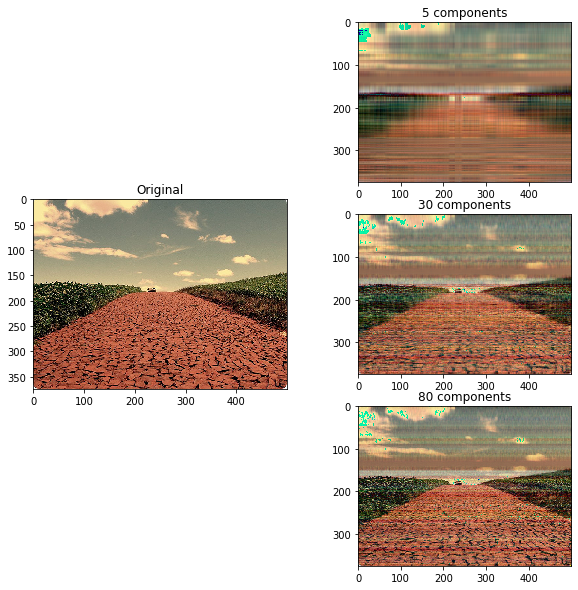

In [10]:
#5.a.PCA

test_img = loaded_images[0]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[0])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 30), PCA_2d(a_g, 30), PCA_2d(a_b, 30)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('30 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 80), PCA_2d(a_g, 80), PCA_2d(a_b, 80)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('80 components')
plt.imshow(recon_color_img)
plt.show()


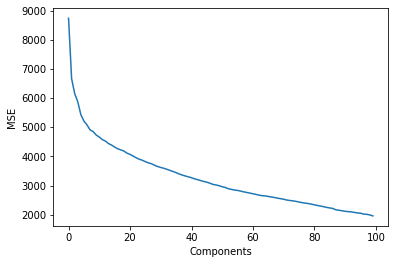

In [11]:
# b. MSE
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [12]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[0.17832647 0.06492913 0.04206676 ... 0.         0.         0.        ]
 [0.15693013 0.05612829 0.03894616 ... 0.         0.         0.        ]
 [0.20084567 0.07610994 0.0359408  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14375    0.0625     0.08125   ]
 [0.         0.         0.         ... 0.07194245 0.10071942 0.1294964 ]
 [0.         0.         0.         ... 0.06779661 0.05423729 0.17288136]]

Red matrix 2nd order:
 [[1.06256040e-01 4.13083108e-02 2.42038838e-02 ... 8.08730971e-05
  4.07558663e-05 1.72651470e-04]
 [1.00491518e-01 3.94491932e-02 2.27409899e-02 ... 6.27122622e-05
  2.67847610e-05 1.38397906e-04]
 [1.09511554e-01 4.25160422e-02 2.54782611e-02 ... 5.42093565e-05
  1.39051864e-05 1.68862534e-04]
 ...
 [7.44969342e-04 4.77852920e-04 2.58544887e-04 ... 4.50342717e-02
  3.22593128e-02 5.61927605e-02]
 [2.44083321e-04 1.23193257e-04 4.14004598e-05 ... 3.76409480e-02
  3.09957380e-02 5.81675903e-02]
 [1.451373

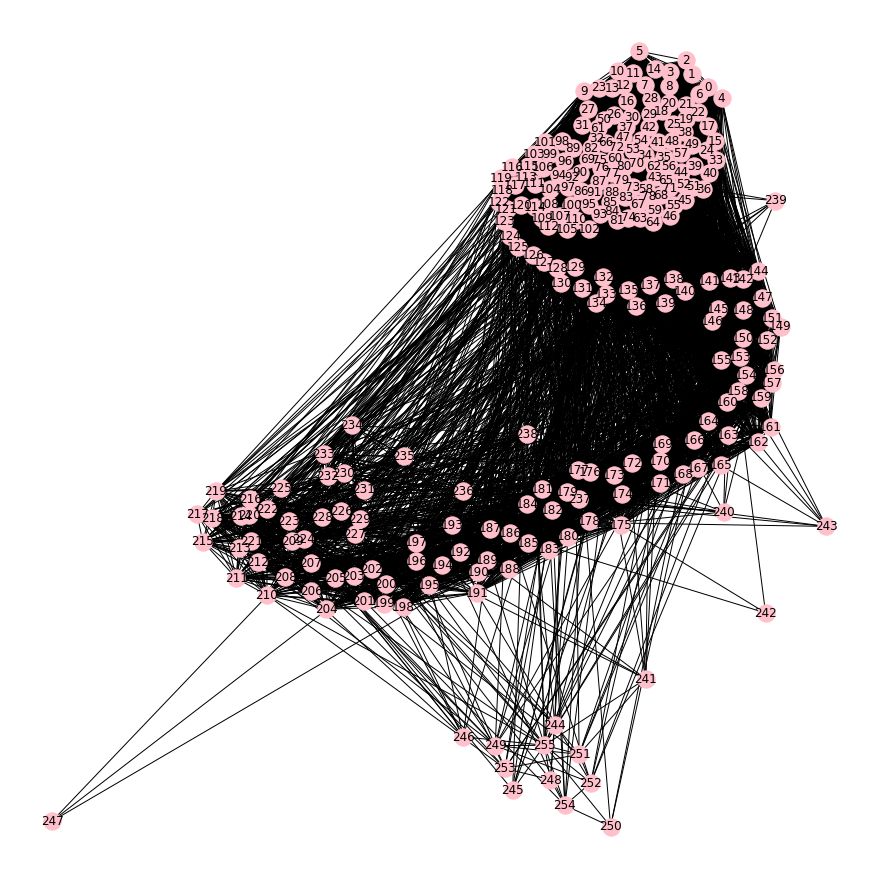

In [13]:
#Graphic representation

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='pink', font_color='black')
plt.show()

In [14]:
test = pd.DataFrame(markov_matrix)
test

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.153151,0.078702,0.060888,0.041478,0.028982,0.023132,0.021803,0.013560,0.014092,0.018878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.166992,0.090318,0.055231,0.045484,0.029890,0.029890,0.018194,0.016244,0.020793,0.012995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.175494,0.073518,0.052964,0.049012,0.020553,0.023715,0.024506,0.015020,0.018972,0.012648,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.164459,0.064018,0.079470,0.038631,0.029801,0.024283,0.024283,0.016556,0.018764,0.015453,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.161435,0.062780,0.050822,0.040359,0.032885,0.023916,0.020927,0.016442,0.020927,0.013453,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.071429,0.000000,0.071429,0.000000,0.000000,0.071429,0.142857,0.000000,0.142857
252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.062500,0.250000
253,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.071429,0.071429,0.071429,0.142857,0.000000,0.000000,0.000000
254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.058824,0.058824,0.000000,0.058824,0.000000,0.176471,0.000000,0.058824,0.176471


In [15]:
#Check properties

def regularity_check(matrix):
    counter = 0
    for a in range(1,6):
        matrix = np.linalg.matrix_power(matrix,a)

        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if matrix[i,j] < 0:
                    counter += 1 
        print('iteration: ' , a, 'negative elements: ' ,counter)
        
regularity_check(markov_matrix)
print('Для 5-ти ітерації, виконується умова регулярності. \nМодель регулярна ')

P = markov_matrix
mc = qe.MarkovChain(P, [str(i) for i in range(0,256)])
print('\nМодель незворотня -  ', mc.is_irreducible)
print("\nКількість рекурентних станів " ,np.shape(mc.recurrent_classes)[1])
if np.shape(mc.recurrent_classes_indices)[1] == 256:
    print('Всі стани рекурентні, модель рекурентна. ')
else :
    print('Модель не рекурентна' )

iteration:  1 negative elements:  0
iteration:  2 negative elements:  0
iteration:  3 negative elements:  0
iteration:  4 negative elements:  0
iteration:  5 negative elements:  0
Для 5-ти ітерації, виконується умова регулярності. 
Модель регулярна 

Модель незворотня -   True

Кількість рекурентних станів  256
Всі стани рекурентні, модель рекурентна. 
